In [1]:
from math import sin, cos, pi

from qiskit import Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram

#QFT dagger obtenido esde qiskit
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ""" 
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/float(2**(j-m)), m, j)
        qc.h(j)

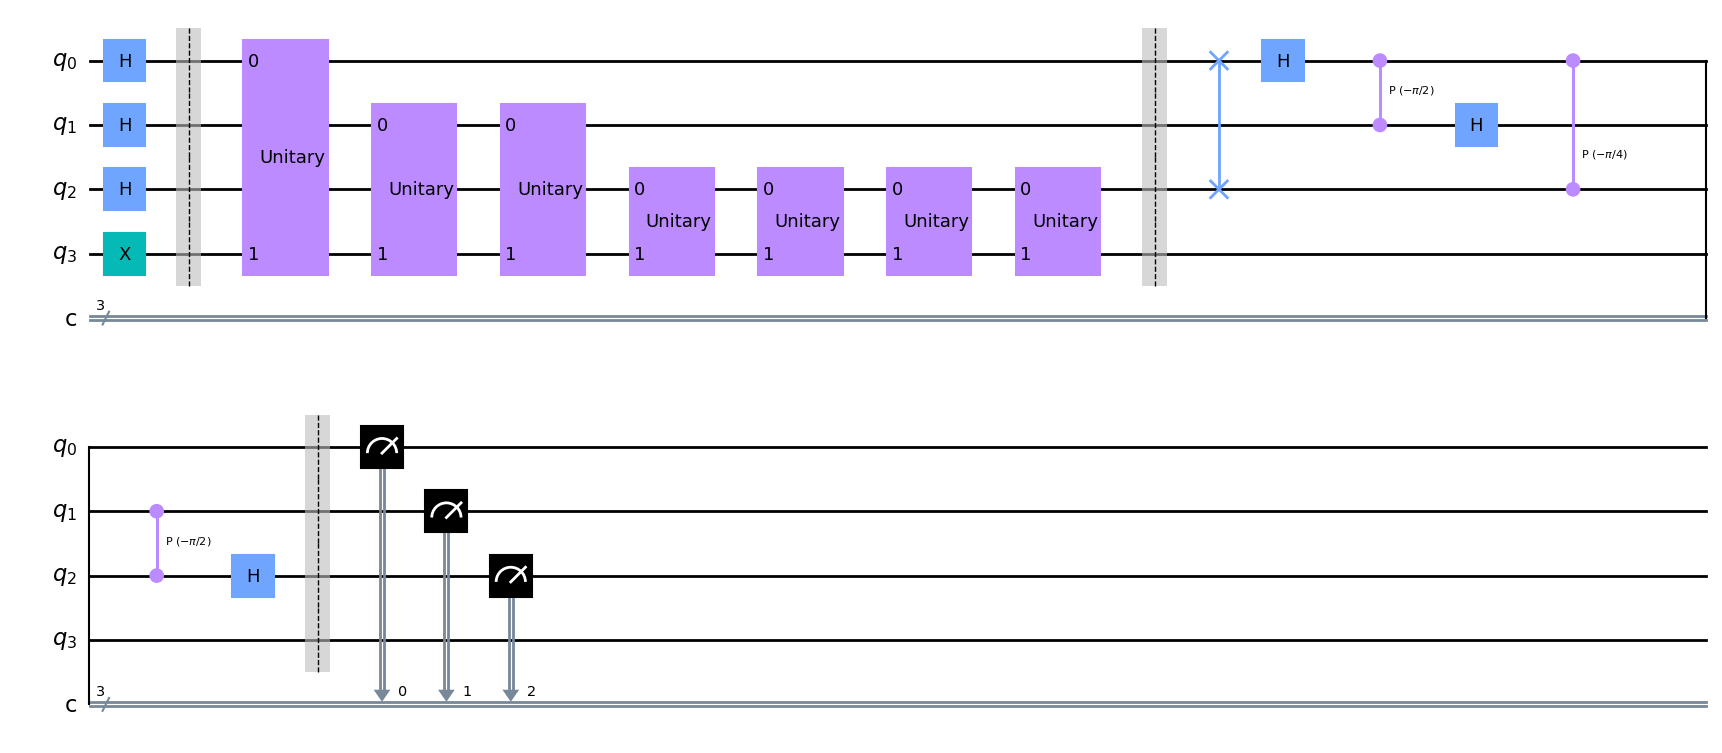

In [2]:
# Para saber directamente cual es el resultado y así comprobar la validez de lo programado,
# genero el operador con la fase que yo quiero.

a=complex(cos(pi/4),sin(pi/4))
f=Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, a]])


#Programamos el circuito 
qpe = QuantumCircuit(4, 3)
qpe.x(3)
for qubit in range(3):
    qpe.h(qubit)
qpe.barrier()

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(f,[counting_qubit, 3]); # This is CU
    repetitions *= 2
qpe.barrier()

qft_dagger(qpe, 3)
qpe.barrier()

for n in range(3):
    qpe.measure(n,n)

qpe.draw(output='mpl')

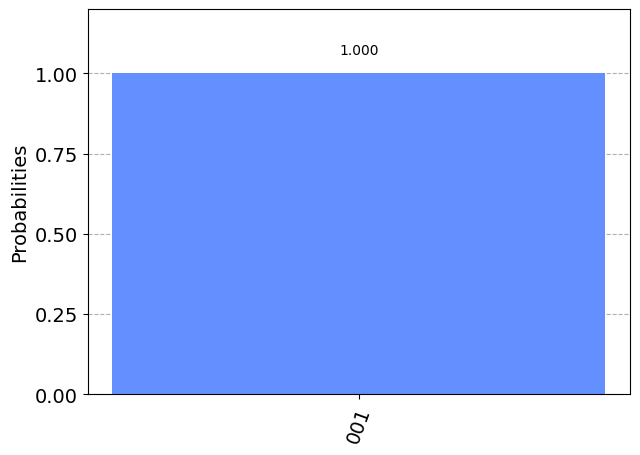

In [3]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)